In [1]:
import json

from transformers import AutoTokenizer

In [2]:
with open('./dataset/train.json', 'r') as f:
    data = json.load(f)

In [3]:
len(data)

23603

In [4]:
model_name = "d:/model/Qwen/Qwen2___5-0___5B-Instruct/"
# model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [5]:
lens = []
for i in data:
    # print(len(tokenizer.encode(i['input']+i['output'])))
    lens.append(len(tokenizer.encode(i['input'] + i['output'])) // 100)

In [6]:
from collections import Counter

In [7]:
res = Counter(lens)

In [8]:
data_statics = []
for i in res:
    data_statics.append([i, res[i]])
data_statics.sort(key=lambda x: x[0])
data_statics

[[1, 3823],
 [2, 3608],
 [3, 1634],
 [4, 1759],
 [5, 3076],
 [6, 1118],
 [7, 3128],
 [8, 1261],
 [9, 2558],
 [10, 1387],
 [11, 225],
 [12, 25],
 [13, 1]]

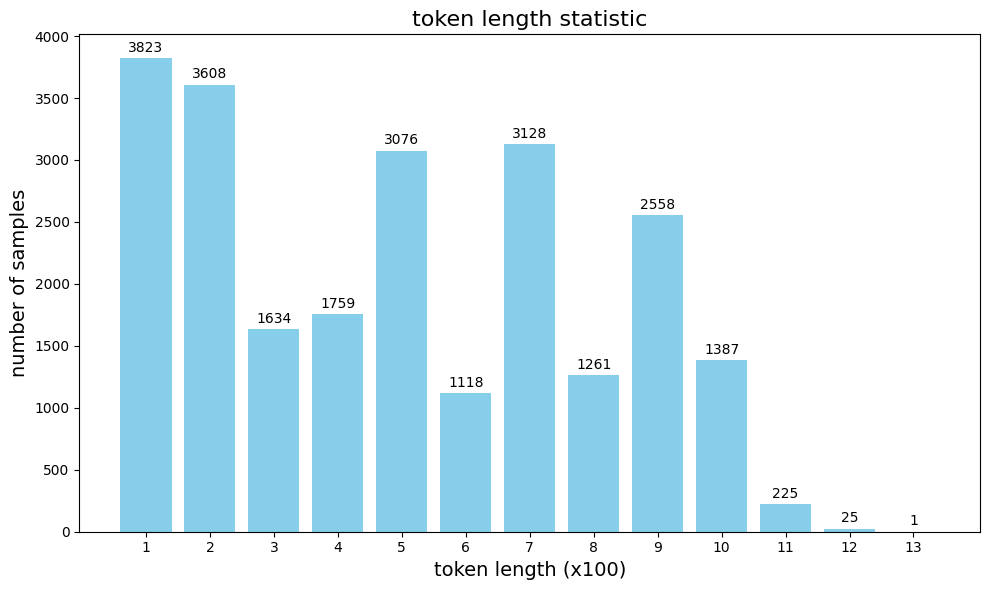

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data_statics = np.array(data_statics)

# 提取键和值
keys = data_statics[:, 0]
values = data_statics[:, 1]

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

# 设置标题和标签
plt.title('token length statistic', fontsize=16)
plt.xlabel('token length (x100)', fontsize=14)
plt.ylabel('number of samples', fontsize=14)

# 添加数值标签
for i, v in enumerate(values):
    plt.text(keys[i], v + 50, str(v), ha='center', fontsize=10)

# 显示图表
plt.xticks(keys)  # 设置 x 轴刻度
plt.tight_layout()
plt.savefig('token_length_statistic.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [10]:
def sample_data(data, min_len=0, max_len=1024):
    res = []
    for i in data:
        seq_len = len(tokenizer.encode(i['input'] + i['output']))
        if seq_len >= min_len and seq_len < max_len:
            res.append(i)
    return res

In [15]:
short_data = sample_data(data, 0, 300)
medium_data = sample_data(data, 300, 700)
long_data = sample_data(data, 700, 1400)

In [16]:
print(len(short_data), len(medium_data), len(long_data))
print(len(short_data) + len(medium_data) + len(long_data))

7431 7587 8585
23603


In [17]:
with open('./dataset/short_data.json', 'w') as f:
    json.dump(short_data, f)

with open('./dataset/medium_data.json', 'w') as f:
    json.dump(medium_data, f)

with open('./dataset/long_data.json', 'w') as f:
    json.dump(long_data, f)

In [28]:
tokenizer

Qwen2TokenizerFast(name_or_path='d:/model/Qwen/Qwen2___5-0___5B-Instruct/', vocab_size=151643, model_max_length=131072, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '<|im_end|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<|box_end|>', '<|quad_start|>', '<|quad_end|>', '<|vision_start|>', '<|vision_end|>', '<|vision_pad|>', '<|image_pad|>', '<|video_pad|>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	151643: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151644: AddedToken("<|im_start|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151645: AddedToken("<|im_end|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151646: AddedToken("<|object_ref_start|>", rstrip=False, lstrip=False, si